# Data Preprocessing and Normalization

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\kevin\Desktop\VSCode\ScaleDux\Startup_Scoring_Dataset.csv')
df.head()

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,7,789,66299,6091495,4183839,263247468
1,S002,4,939,34866,9106842,666326,172927107
2,S003,8,42,73630,8817088,649150,313090455
3,S004,5,57,93657,6374167,20153173,305887183
4,S005,7,512,61187,841971,118834,84815222


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   startup_id               100 non-null    object
 1   team_experience          100 non-null    int64 
 2   market_size_million_usd  100 non-null    int64 
 3   monthly_active_users     100 non-null    int64 
 4   monthly_burn_rate_inr    100 non-null    int64 
 5   funds_raised_inr         100 non-null    int64 
 6   valuation_inr            100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [4]:
df.isnull().sum()

startup_id                 0
team_experience            0
market_size_million_usd    0
monthly_active_users       0
monthly_burn_rate_inr      0
funds_raised_inr           0
valuation_inr              0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team_experience,100.0,5.910000e+00,2.871296e+00,1.0,3.000000e+00,6.0,8.000000e+00,10.0
market_size_million_usd,100.0,5.485000e+02,2.700250e+02,14.0,3.467500e+02,578.0,7.550000e+02,996.0
monthly_active_users,100.0,5.200267e+04,2.919344e+04,954.0,2.672925e+04,52472.5,7.468475e+04,98606.0
monthly_burn_rate_inr,100.0,5.271927e+06,2.801648e+06,166381.0,2.928578e+06,5277296.0,7.694987e+06,9931393.0
funds_raised_inr,100.0,2.256808e+07,1.633037e+07,118834.0,5.996659e+06,22143053.5,3.549996e+07,49655442.0
valuation_inr,100.0,2.316022e+08,1.388826e+08,10070640.0,1.121723e+08,243729555.0,3.198588e+08,497894795.0


In [6]:
num_cols = df.select_dtypes(include=['int64']).columns
print(num_cols)

Index(['team_experience', 'market_size_million_usd', 'monthly_active_users',
       'monthly_burn_rate_inr', 'funds_raised_inr', 'valuation_inr'],
      dtype='object')


In [7]:
df[num_cols].duplicated().sum()

0

In [8]:
# Invert negatively correlated feature
df['monthly_burn_rate_inr'] = df['monthly_burn_rate_inr'].max() - df['monthly_burn_rate_inr']

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [10]:
df.head()

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,0.666667,0.789206,0.669162,0.393230,0.082061,0.518992
1,S002,0.333333,0.941955,0.347274,0.084439,0.011052,0.333843
2,S003,0.777778,0.028513,0.744235,0.114112,0.010706,0.621166
3,S004,0.444444,0.043788,0.949320,0.364283,0.404435,0.606400
4,S005,0.666667,0.507128,0.616813,0.930815,0.000000,0.153220


# Feature Engineering

In [11]:
# Define weights for each feature in the composite score
weights = {
    'team_experience': 15,
    'market_size_million_usd': 20,
    'monthly_active_users': 25,
    'monthly_burn_rate_inr': 10,
    'funds_raised_inr': 15,
    'valuation_inr': 15
}

In [12]:
df['composite_score'] = sum(df[col] * weight for col, weight in weights.items())

In [13]:
# Rank startups by composite score
df['rank'] = df['composite_score'].rank(ascending=False)

In [14]:
startups_ranked = df.sort_values(by='rank')

In [15]:
top_10 = startups_ranked.head(10)[['startup_id', 'composite_score', 'rank']]
print(top_10)

   startup_id  composite_score  rank
5        S006        81.037331   1.0
76       S077        77.047933   2.0
44       S045        75.655026   3.0
32       S033        74.936099   4.0
12       S013        74.675295   5.0
28       S029        73.114982   6.0
96       S097        70.037973   7.0
11       S012        69.810579   8.0
7        S008        69.671483   9.0
42       S043        69.554850  10.0


In [16]:
bottom_10 = startups_ranked.tail(10)[['startup_id', 'composite_score', 'rank']]
print(bottom_10)

   startup_id  composite_score   rank
73       S074        33.662372   91.0
16       S017        33.527899   92.0
60       S061        32.964227   93.0
50       S051        32.321262   94.0
78       S079        30.430187   95.0
83       S084        30.144740   96.0
57       S058        28.567332   97.0
22       S023        26.262269   98.0
97       S098        26.158777   99.0
54       S055        19.094732  100.0


In [17]:
# Numerical Columns Statistics
DASH = '-' * 50
print(f"Numerical Columns Statistics")
print(f"{DASH}")
for col in num_cols:
    print(f"{col}")
    print(f"    Min: {df[col].min():.2f}")
    print(f"    Max: {df[col].max():.2f}")
    print(f"    Mean: {df[col].mean():.2f}")
    print(f"    Median: {df[col].median():.2f}")
    print(f"    Standard Deviation: {df[col].std():.2f}")
    print(DASH)

Numerical Columns Statistics
--------------------------------------------------
team_experience
    Min: 0.00
    Max: 1.00
    Mean: 0.55
    Median: 0.56
    Standard Deviation: 0.32
--------------------------------------------------
market_size_million_usd
    Min: 0.00
    Max: 1.00
    Mean: 0.54
    Median: 0.57
    Standard Deviation: 0.27
--------------------------------------------------
monthly_active_users
    Min: 0.00
    Max: 1.00
    Mean: 0.52
    Median: 0.53
    Standard Deviation: 0.30
--------------------------------------------------
monthly_burn_rate_inr
    Min: 0.00
    Max: 1.00
    Mean: 0.48
    Median: 0.48
    Standard Deviation: 0.29
--------------------------------------------------
funds_raised_inr
    Min: 0.00
    Max: 1.00
    Mean: 0.45
    Median: 0.44
    Standard Deviation: 0.33
--------------------------------------------------
valuation_inr
    Min: 0.00
    Max: 1.00
    Mean: 0.45
    Median: 0.48
    Standard Deviation: 0.28
-----------------

In [18]:
# Composite Score Statistics
print(f"Composite Score Statistics")
print(f"    Min: {df['composite_score'].min():.2f}")
print(f"    Max: {df['composite_score'].max():.2f}")
print(f"    Mean: {df['composite_score'].mean():.2f}")
print(f"    Median: {df['composite_score'].median():.2f}")
print(f"    Standard Deviation: {df['composite_score'].std():.2f}")

Composite Score Statistics
    Min: 19.09
    Max: 81.04
    Mean: 50.52
    Median: 48.76
    Standard Deviation: 13.03


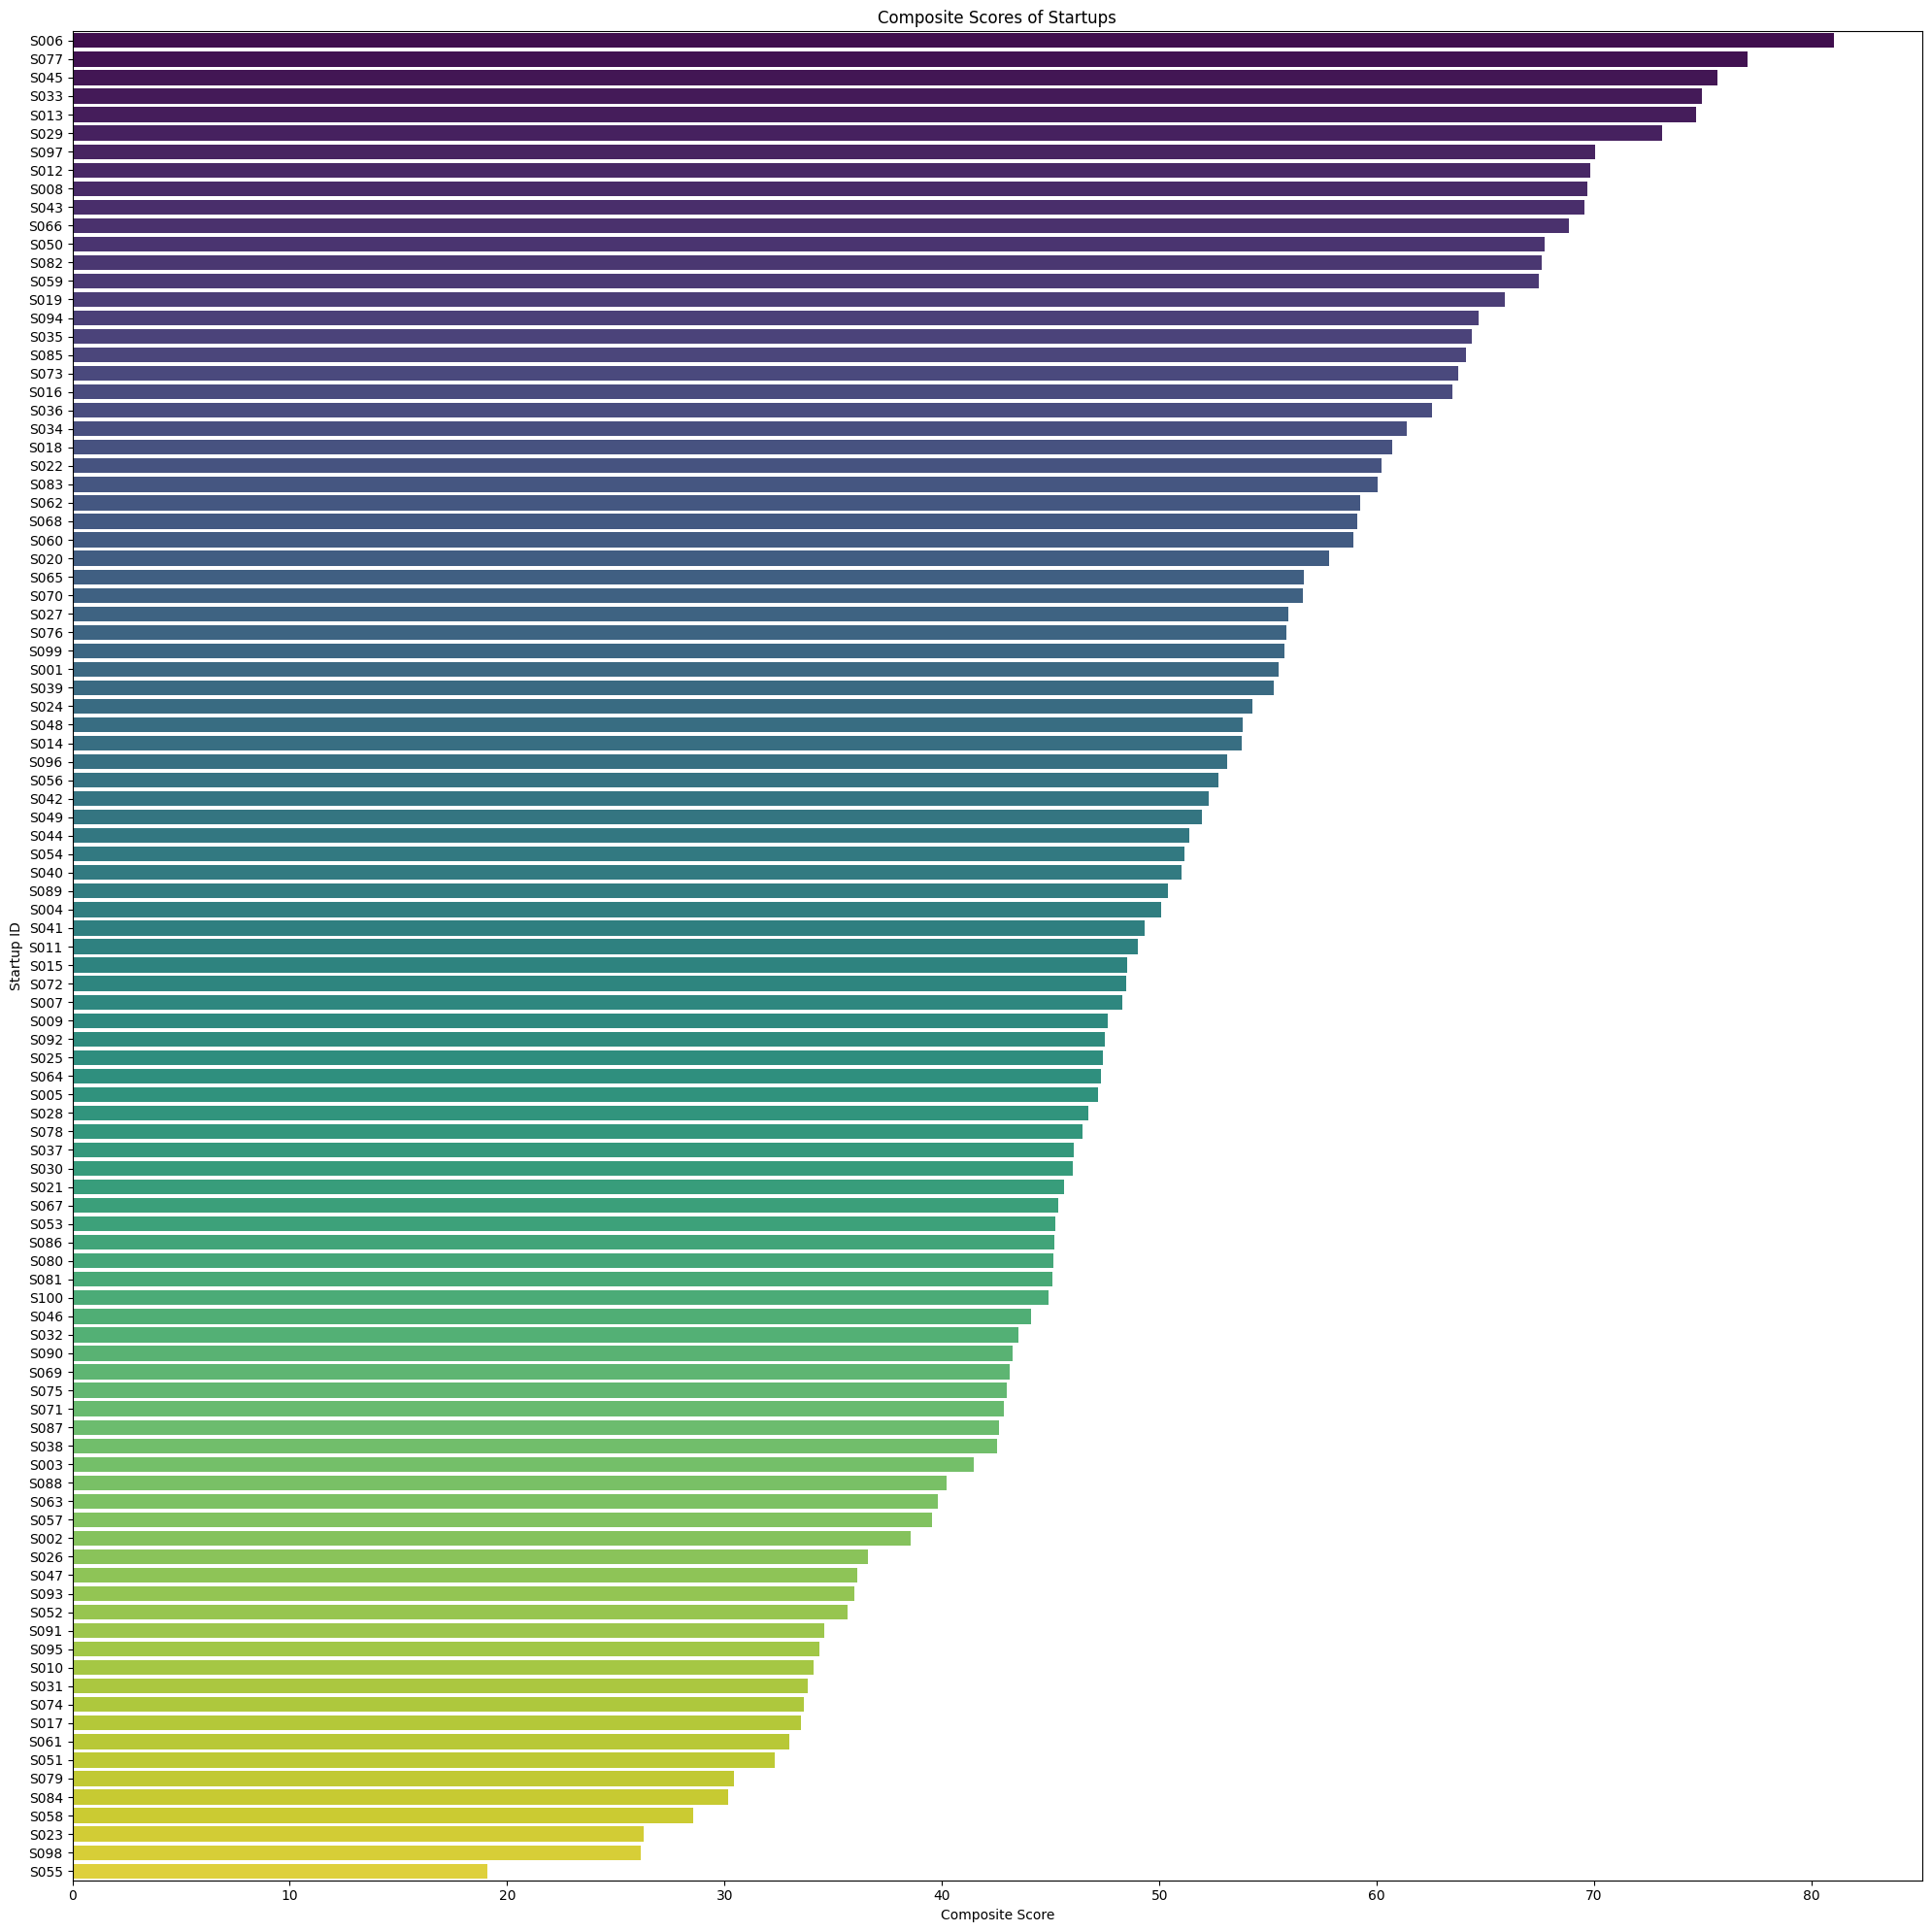

In [19]:
# bar chart of composite scores sorted
plt.figure(figsize=(20, 20))
sns.barplot(x='composite_score', y='startup_id', data=startups_ranked.sort_values(by='composite_score', ascending=False), palette='viridis')
plt.title('Composite Scores of Startups')
plt.xlabel('Composite Score')
plt.ylabel('Startup ID')
plt.tight_layout()
plt.savefig(r'C:\Users\kevin\Desktop\VSCode\ScaleDux\output\composite_scores_bar_chart.png')
plt.show()

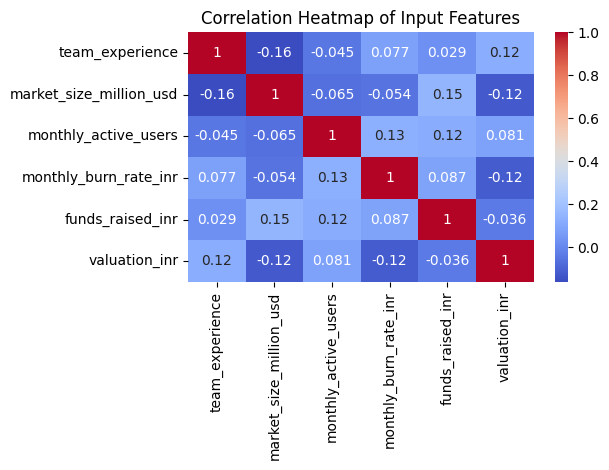

In [20]:
# Correlation heatmap between input features
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Input Features')
plt.tight_layout()
plt.savefig(r'C:\Users\kevin\Desktop\VSCode\ScaleDux\output\correlation_heatmap.png')
plt.show()

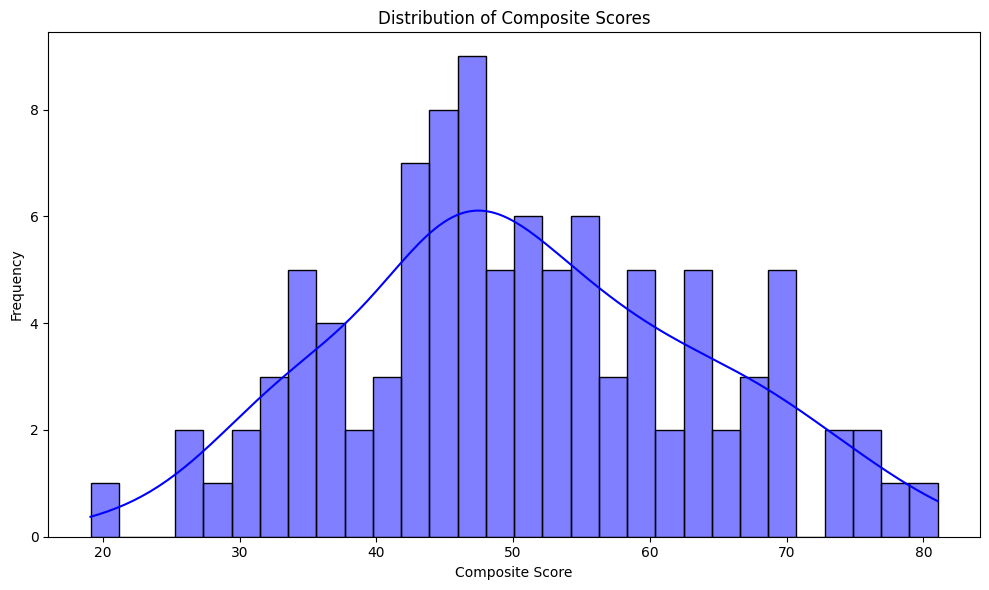

In [21]:
# Score distribution histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['composite_score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Composite Scores')
plt.xlabel('Composite Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(r'C:\Users\kevin\Desktop\VSCode\ScaleDux\output\composite_score_distribution.png')
plt.show()

In [22]:
# view highest ranked startup and adjust monthly burn rate to reflect the original scale
highest_ranked_startup = startups_ranked.iloc[0]
highest_ranked_startup['monthly_burn_rate_inr'] = df['monthly_burn_rate_inr'].max() - highest_ranked_startup['monthly_burn_rate_inr']
print(highest_ranked_startup)

startup_id                      S006
team_experience                  1.0
market_size_million_usd     0.409369
monthly_active_users        0.972689
monthly_burn_rate_inr       0.039404
funds_raised_inr            0.985549
valuation_inr               0.609569
composite_score            81.037331
rank                             1.0
Name: 5, dtype: object


In [23]:
# view lowest ranked startup and adjust monthly burn rate to reflect the original scale
lowest_ranked_startup = startups_ranked.iloc[-1]
lowest_ranked_startup['monthly_burn_rate_inr'] = df['monthly_burn_rate_inr'].max() - lowest_ranked_startup['monthly_burn_rate_inr']
print(lowest_ranked_startup)

startup_id                      S055
team_experience             0.777778
market_size_million_usd     0.157841
monthly_active_users        0.020041
monthly_burn_rate_inr       0.702822
funds_raised_inr            0.018661
valuation_inr               0.034569
composite_score            19.094732
rank                           100.0
Name: 54, dtype: object


## Highest Scoring Startup — S006:
  Scored very high (≈81.03) due to a blend of strong team experience, large market, high user traction, low burn rate (efficient spending), significant funding, and a high valuation. This combination reflects well-rounded and sustainable growth potential.

## Lowest Scoring Startup — S055:
 Scored very low (≈19.09) due to below-average performance across most metrics: low team experience, small market, low traction, high relative burn, little funding, and a low valuation, all indicating weak fundamentals.

In [24]:
df.head()

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr,composite_score,rank
0,S001,0.666667,0.789206,0.669162,0.393230,0.082061,0.518992,55.461254,35.0
1,S002,0.333333,0.941955,0.347274,0.084439,0.011052,0.333843,38.538769,82.0
2,S003,0.777778,0.028513,0.744235,0.114112,0.010706,0.621166,41.461991,78.0
3,S004,0.444444,0.043788,0.949320,0.364283,0.404435,0.606400,50.080784,48.0
4,S005,0.666667,0.507128,0.616813,0.930815,0.000000,0.153220,47.169343,58.0


In [25]:
model_df = df.drop(columns=['startup_id', 'rank'])

In [26]:
X = model_df.drop(columns=['composite_score'])
y = model_df['composite_score']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [29]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse'),
    'Gradient Boost': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [30]:
results = {}
DASH = '-' * 50

for name, model in models.items():
    print(f"Training {name} model...")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    print(f"{name} Results:")
    print(f"    MSE: {mse:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    MAE: {mae:.4f}")
    print(f"    R2: {r2:.4f}")
    print(DASH)

Training Random Forest model...
Random Forest Results:
    MSE: 37.9265
    RMSE: 6.1584
    MAE: 4.9390
    R2: 0.8238
--------------------------------------------------
Training XGBoost model...
XGBoost Results:
    MSE: 39.4952
    RMSE: 6.2845
    MAE: 5.0470
    R2: 0.8165
--------------------------------------------------
Training Gradient Boost model...
Gradient Boost Results:
    MSE: 20.7869
    RMSE: 4.5593
    MAE: 3.6244
    R2: 0.9034
--------------------------------------------------


In [31]:
output_dir = r'C:\Users\kevin\Desktop\VSCode\ScaleDux\output'
os.makedirs(output_dir, exist_ok=True)
DASH = '-' * 50

--------------------------------------------------

📊 Feature Importances from Random Forest:
                   Feature  Importance
2     monthly_active_users    0.415527
4         funds_raised_inr    0.220376
0          team_experience    0.145969
1  market_size_million_usd    0.096043
5            valuation_inr    0.065800
3    monthly_burn_rate_inr    0.056285


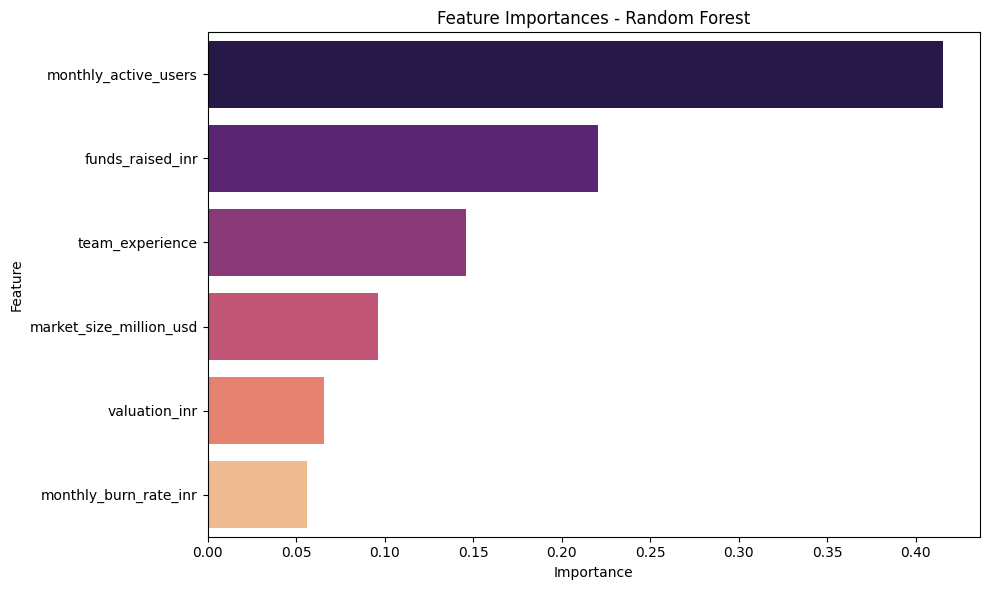

--------------------------------------------------

📊 Feature Importances from XGBoost:
                   Feature  Importance
2     monthly_active_users    0.401301
4         funds_raised_inr    0.235751
0          team_experience    0.176647
1  market_size_million_usd    0.078061
5            valuation_inr    0.063267
3    monthly_burn_rate_inr    0.044974


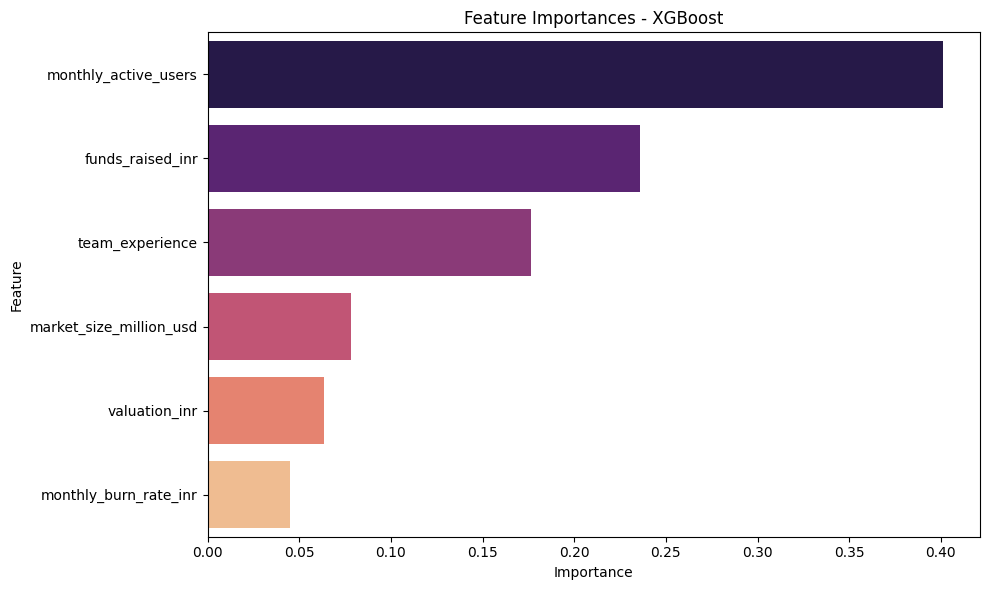

--------------------------------------------------

📊 Feature Importances from Gradient Boost:
                   Feature  Importance
2     monthly_active_users    0.388972
4         funds_raised_inr    0.207644
0          team_experience    0.152714
1  market_size_million_usd    0.122172
5            valuation_inr    0.081398
3    monthly_burn_rate_inr    0.047100


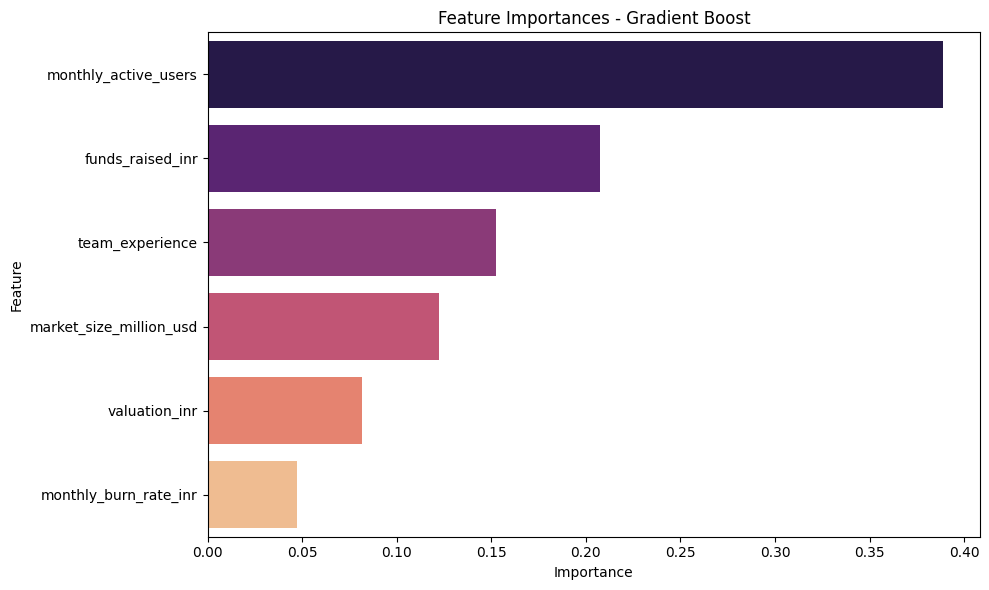

In [ ]:
# Plotting feature importances
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        print(DASH)
        importances = model.feature_importances_
        feature_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        print(f"\n Feature Importances from {name}:")
        print(feature_df)

        # Plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_df, palette='magma')
        plt.title(f'Feature Importances - {name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()

        # Save
        file_name = f"feature_importances_{name.lower().replace(' ', '_')}.png"
        plt.savefig(os.path.join(output_dir, file_name))
        plt.show()
        plt.close()

        
